In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds

In [2]:
import matplotlib.pyplot as plt
import cv2

In [3]:
import glob
import os

In [4]:
def LoadFDDB(root_path):
    label_files = glob.glob(os.path.join(root_path, 'FDDB-folds\\FDDB-fold-*-ellipseList.txt'))

    data = {}
    data['images'] = []
    data['ellipses'] = []

    for fname in label_files:
        with open(fname) as f:
            raw_label = f.read().strip().split('\n')
            
            id = 0
            
            while id < len(raw_label):
                image_name = os.path.join(root_path, 'originalPics', raw_label[id]) + '.jpg'
                image_name = os.path.normpath(image_name)
                ell_num = int(raw_label[id + 1])
                id += 2
                
                ellipses = []
                for i in range(ell_num):
                    ell = tuple(map(float, raw_label[id+i].split(' ')[:-2]))
                    ellipses.append(ell)
                
                id += ell_num
                
                data['images'].append(image_name)
                data['ellipses'].append(ellipses)
    return data

In [5]:
data = ccccccccccccccccc('D:\\Datasets\\FDDB')

In [6]:
TRAIN_LENGTH = int(0.8 * len(data['images']))
TEST_LENGTH = len(data['images']) - TRAIN_LENGTH
BUFFER_SIZE = 1000
BATCH_SIZE = 64

In [7]:
def load_and_preprocess_image(path):
    image = tf.io.read_file(path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.cast(image, tf.float32)
    image /= 255.0
    shape = tf.shape(image)
    image = tf.pad(image, [[0, 450 - shape[0]], [0, 450 - shape[1]], [0, 0]])
    
    return image
    

In [8]:
labels = tf.data.Dataset.from_generator(lambda: data['ellipses'], tf.float32, [None, 5])

In [9]:
images = tf.data.Dataset.from_tensor_slices(data['images'])

In [10]:
images = images.map(load_and_preprocess_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)

In [11]:
ds = tf.data.Dataset.zip((images, labels)).shuffle(BUFFER_SIZE).prefetch(2)

In [12]:
train = ds.take(TRAIN_LENGTH)
test = ds.skip(TEST_LENGTH)

In [13]:
def DrawExample(example):
    image = example[0].numpy()
    ellipses = example[1].numpy()
    
    for ell in ellipses:
        center_coordinates = (int(ell[3]), int(ell[4]))
        axesLength = (int(ell[0]), int(ell[1]))
        angle = int(180.0 / 3.1416 * ell[2])

        cv2.ellipse(image, center_coordinates, axesLength, angle, 0, 360, (0,255,0), 1)
    
    plt.figure(figsize=(10, 10))
    plt.imshow(image)

In [14]:
d = next(iter(train))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


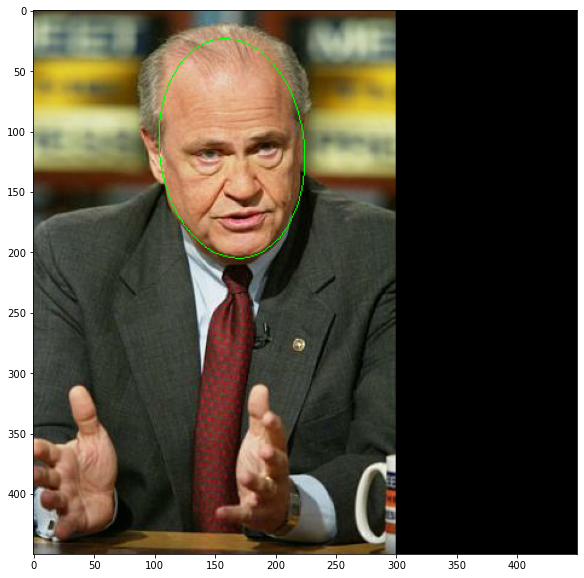

In [266]:
DrawExample(d)